In [ ]:
import numpy as np
import pandas as pd
iris = pd.read_csv('/content/drive/MyDrive/iris.data.csv');
print(iris.info)

<bound method DataFrame.info of      5.1  3.5  1.4  0.2  Iris-setosa
0    4.9  3.0  1.4  0.2  Iris-setosa
1    4.7  3.2  1.3  0.2  Iris-setosa
2    4.6  3.1  1.5  0.2  Iris-setosa
3    5.0  3.6  1.4  0.2  Iris-setosa
4    5.4  3.9  1.7  0.4  Iris-setosa
..   ...  ...  ...  ...          ...
144  6.7  3.0  5.2  2.3  Iris-setosa
145  6.3  2.5  5.0  1.9  Iris-setosa
146  6.5  3.0  5.2  2.0  Iris-setosa
147  6.2  3.4  5.4  2.3  Iris-setosa
148  5.9  3.0  5.1  1.8  Iris-setosa

[149 rows x 5 columns]>


In [ ]:
iris.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Iteration 0: Loss = 1.0986
Iteration 100: Loss = 0.7333
Iteration 200: Loss = 0.6079
Iteration 300: Loss = 0.5423
Accuracy: 88.89%


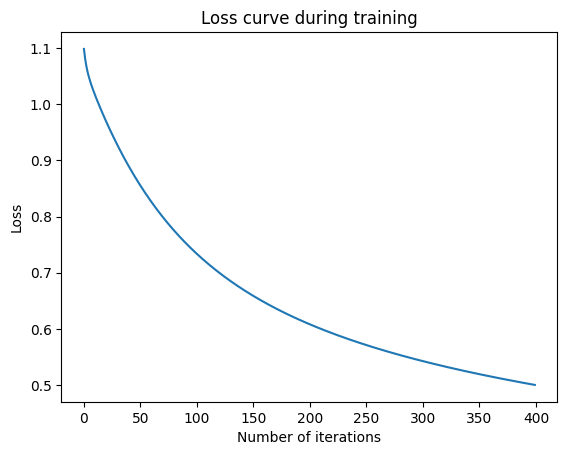

Mean Absolute Error (MAE): 0.1111
Mean Squared Error (MSE): 0.1111
Root Mean Squared Error (RMSE): 0.3333


In [21]:
# Implement Multilinear gradient decent Logistic Regression on Iris dataset

# mae mse msre

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0, 1, 2 for three flower classes  for all sample :)

# One-hot encode the target variable (for multiclass logistic regression)
onehot_encoder = OneHotEncoder(sparse_output=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))  # Convert labels to one-hot encoding


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def normalize(z):
    exp_z = np.exp(z - np.max(z))  # For numerical stability
    return exp_z / exp_z.sum(axis=1, keepdims=True)

# cost  of the function is being calucated here :)

# def compute_cost(X, y, weights):
#     m = X.shape[0]
#     predictions = sigmoid(np.dot(X, weights))
#     cost = -np.sum(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15)) / m
#     return cost

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    # Clip predicted values to avoid log(0)
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
    loss = -np.sum(y_true * np.log(y_pred)) / n_samples
    return loss

def gradient_descent(X, y, learning_rate=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    n_classes = y.shape[1]

    # Initialize weights and bias
    weights = np.zeros((n_features, n_classes))    # define beta values  initially as 0 and size defined :)
    bias = np.zeros((1, n_classes))

    losses = []  # To track loss at each iteration

    # Gradient Descent loop
    for i in range(n_iters):
        # Linear model
        linear_model = np.dot(X, weights) + bias
        # Apply normalize activation function for multiclass
        y_pred = normalize(linear_model)

        # Compute loss
        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # Gradient for weights
        db = (1 / n_samples) * np.sum(y_pred - y, axis=0, keepdims=True)  # Gradient for bias

        # Update weights and bias
        weights -= learning_rate * dw    # here b is being updated  as matrix only   weights are beta value :)
        bias -= learning_rate * db

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, losses

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

# Train the logistic regression model with gradient descent
learning_rate = 0.01
n_iters = 400

weights, bias, losses = gradient_descent(X_train, y_train, learning_rate, n_iters)

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = normalize(linear_model)
    return np.argmax(y_pred, axis=1)  # Return the index of the max value (class)

# Make predictions on the test set
y_test_pred = predict(X_test, weights, bias)

# Convert one-hot encoded test labels back to original form for comparison
y_test_labels = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_test_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

import matplotlib.pyplot as plt

# Plot the loss curve
plt.plot(range(n_iters), losses)
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.title("Loss curve during training")
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_labels, y_test_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_labels, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Q2 DECISION TREE FOR GIVEN WEATHER DATA


In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/weather.csv')
df

,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1
5,sunny,cool,normal,1,0
6,overcast,cool,normal,1,1
7,rainy,mild,high,0,0
8,rainy,cool,normal,0,1
9,sunny,mild,normal,0,1


In [61]:
df_encoded = pd.get_dummies(df, columns=['Outlook', 'Temp', 'Humidity'], drop_first=True)
print(df_encoded)

    Windy  Play  Outlook_rainy  Outlook_sunny  Temp_hot  Temp_mild  \
0       0     0           True          False      True      False   
1       1     0           True          False      True      False   
2       0     1          False          False      True      False   
3       0     1          False           True     False       True   
4       0     1          False           True     False      False   
5       1     0          False           True     False      False   
6       1     1          False          False     False      False   
7       0     0           True          False     False       True   
8       0     1           True          False     False      False   
9       0     1          False           True     False       True   
10      1     1           True          False     False       True   
11      1     1          False          False     False       True   
12      0     1          False          False      True      False   
13      1     0     

In [70]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_encoded.drop('Play', axis=1)
y = df_encoded['Play']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [65]:
# Experiment with different parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the new model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



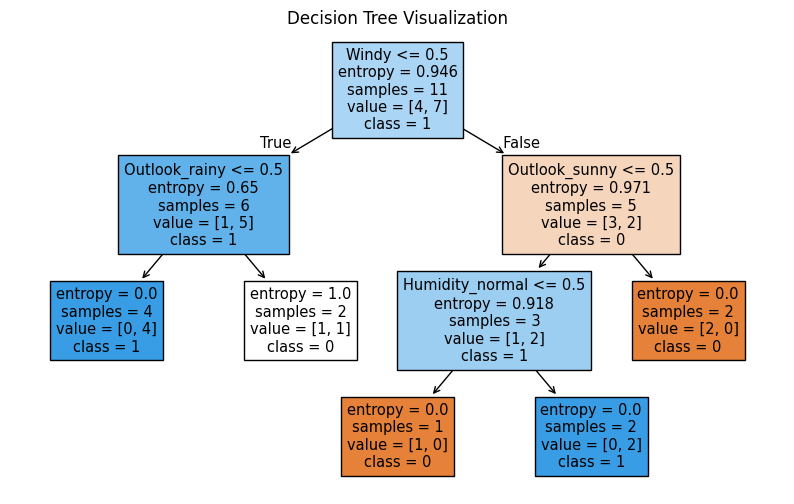

In [71]:
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Decision Tree Visualization")
plt.show()